### This program is to test the flow of the Lane lines extraction pipeline

#### import necessary libraries

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

#### Step 1 : Read the input image

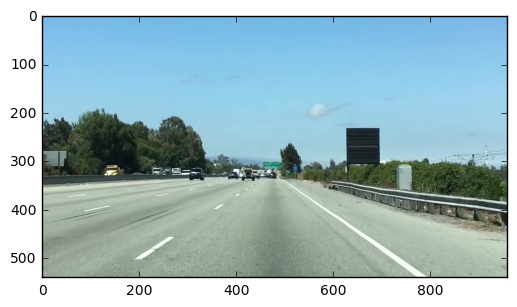

In [12]:
input_image = mpimg.imread("test.jpg")
plt.imshow(input_image);plt.show()

#### Step 2 : Canny Edge Detection
Step 2.1 : Convert to Gray scale image

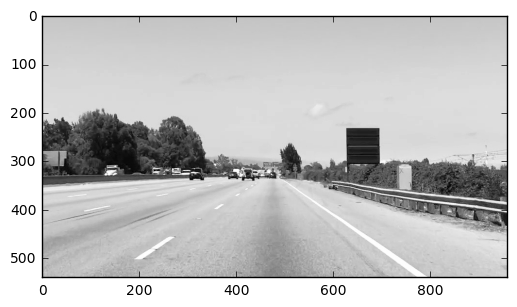

In [13]:
gray_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap = 'Greys_r');plt.show()
# If cmap='Greys_r' is ignored, the default will be a red shaded image, try it

Step 2.2 : Apply Gaussian Filter with Kernel_size of 5 X 5

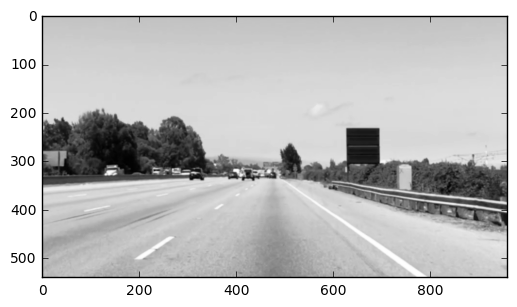

In [14]:
kernel_size = 5
blur_image = cv2.GaussianBlur(gray_image, (kernel_size , kernel_size),0)
plt.imshow(blur_image, cmap = 'Greys_r');plt.show()

Step 2.3 : Apply Canny Edge Detection Algorithm

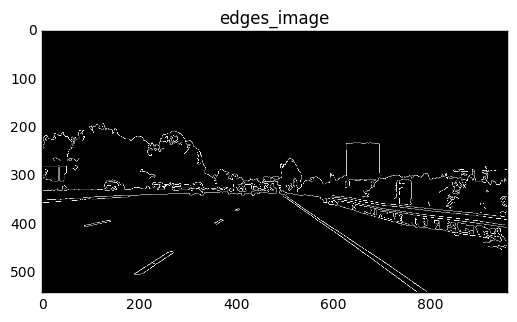

In [15]:
low_threshold = 50
high_threshold  = 150
# It's recommeded the ratio of low to high is 1:2 or 1:3
edges_image = cv2.Canny(blur_image, low_threshold, high_threshold)
plt.imshow(edges_image, cmap = 'Greys_r');plt.title('edges_image');plt.show()

#### Step 3 : Region Masking
Create a blank Image of same size and a polygon in Region of Interest (RoI)

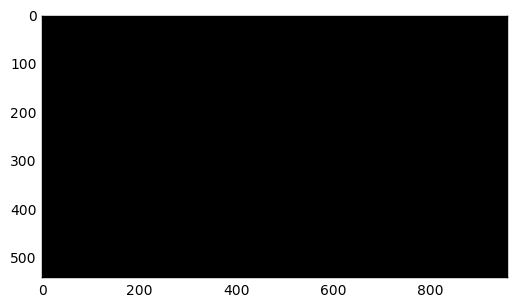

In [16]:
# Create a blank image of same size
mask_image = np.copy((edges_image))*0
ignore_mask_colour = 255
plt.imshow(mask_image,cmap = 'Greys_r');plt.show()

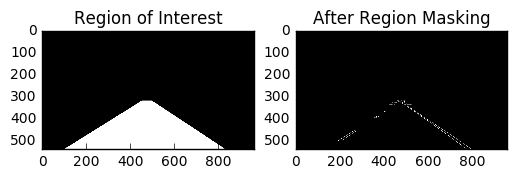

In [17]:
# Create a polygon in the region of Interest
img_shape = mask_image.shape;
roi_vertices = np.array([[(100, img_shape[0]), (450, 320), (495,320), (825,540)]],dtype = np.int32);
cv2.fillPoly(mask_image, roi_vertices, ignore_mask_colour);
plt.subplot(121);
plt.imshow(mask_image, cmap = 'Greys_r');plt.title('Region of Interest')
masked_edges = cv2.bitwise_and(edges_image, mask_image);
plt.subplot(122)
plt.imshow(masked_edges, cmap = 'Greys_r');plt.title('After Region Masking');plt.show()

#### Step 4 : Applying Hough Transform to the edge-selected image

In [18]:
# Define Parameters for Hough Transform
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution
threshold = 1 # minimum no. of votes
min_line_length = 5 # minimum no. of pixels making a line to select
max_line_length = 1 # max gap in pixels between connecting line segment
line_image = np.copy(input_image) * 0 # Create a blank image

<class 'numpy.ndarray'> (63, 1, 4)


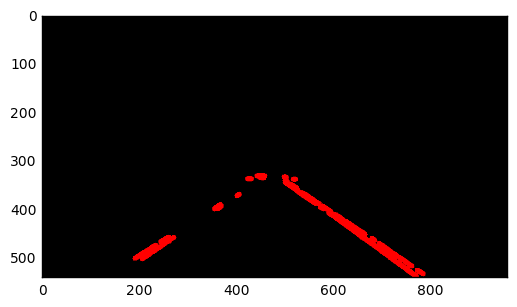

In [19]:
# Run Hough Transform on the "masked edges" image
lines_detected = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_length)
print(type(lines_detected), lines_detected.shape)

# Iterate over the lines
for line in lines_detected:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)# draw lines and with red colour and thickness of 10
plt.imshow(line_image);plt.show()

#### Step 4 : Blending the O/P of Hough with O/P of Canny

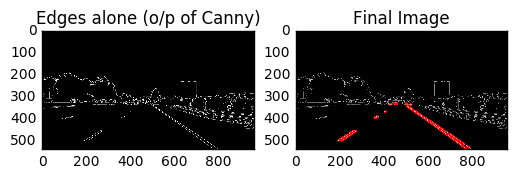

In [20]:
# finally blending the 'edges_image' (output of Canny) with the line image
colour_edges = np.dstack((edges_image,edges_image,edges_image))
plt.subplot(121);
plt.imshow(colour_edges);plt.title('Edges alone (o/p of Canny)')
final_image = cv2.addWeighted(colour_edges, 0.8, line_image,1,0) 
plt.subplot(122);
plt.imshow(final_image);plt.title('Final Image');plt.show()